Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChains
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-202.177,-211.809,1.42137e-59
2,140.151,4.0,-199.537,-209.155,2.01991e-58
3,140.302,4.0,-196.926,-206.529,2.78993e-57
4,140.452,4.0,-194.343,-203.932,3.74536e-56
5,140.603,4.0,-191.789,-201.363,4.88686e-55
6,140.754,4.0,-189.263,-198.823,6.19734e-54
7,140.905,4.0,-186.765,-196.312,7.63867e-53
8,141.055,4.0,-184.296,-193.828,9.15099e-52
9,141.206,4.0,-181.855,-191.374,1.06551e-50


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,156.131,10.8342,-70.7664,-79.1909,0.0559628
2,152.965,5.84925,-69.0855,-77.6957,0.249623
3,154.623,7.21608,-67.8263,-76.3361,0.97214
4,154.623,5.68844,-69.1131,-77.6229,0.268467
5,154.774,7.37688,-67.8734,-76.3744,0.93565
6,152.362,6.41206,-68.7579,-77.4063,0.333398
7,154.623,7.37688,-67.8393,-76.3491,0.959616
8,149.95,7.45729,-70.8729,-79.6831,0.0342103
9,151.608,6.65327,-69.2703,-77.9677,0.190172


### Snippet 4.23

Density of sigma

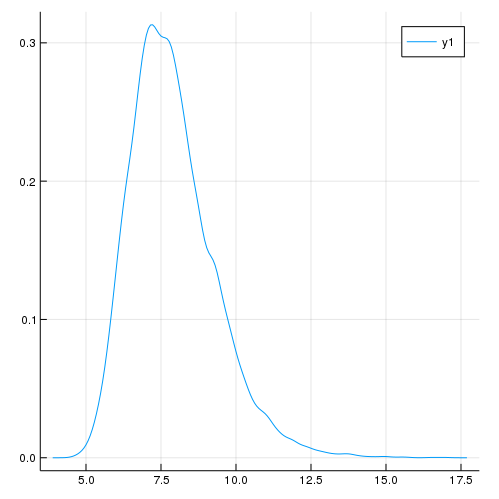

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*